In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random

import scipy.stats as st

In [2]:
# 1: procedure BLB

k = 10 #number of partitions
r = 500 #bootstrap iterations

# tau: estimators
tau = np.zeros([k,r])

def estimator_mean(data):
    return np.mean(data)

def estimator_var(data):
    return np.var(data)

In [3]:
def blb(estimator_func, data, n):
    
    # randomly partition X into k subsets
    random.shuffle(data)
    partitions = [data[i:i + k] for i in range(0, len(data), k)]

    # range for randint
    low=0
    high=len(partitions[0]) #don't need to do b-1 because upper bound is exclusive

    # for each partition
    for i in range(k):
    
        b = len(partitions[i]) 
    
        # for each partition, create r subsets
        for c in range(r):
            I = np.random.randint(low, high, size=n)
            replicate = data[I]
        
        
            tau[i,c] = estimator_func(replicate)  
           
        low = low + b
        high = high + b
        
    # mean and var of estimators for each prtition, not the data        
    theta_vec = np.mean(tau,axis=1)
    sigma_sq_vec = np.var(tau,axis=1) #var

    # should be private. for now, non private
    theta = np.mean(theta_vec)
    sigma_sq = np.mean(sigma_sq_vec) #var

    return (theta, sigma_sq)

In [18]:
def plot(true_theta):
    # ploting mean: normal coordinates
    plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
    plt.plot([str(e) for e in list_of_n], theta_hat_vec, 
             marker='o', color='blue', label='mean of estimates')
    plt.xlabel("size of n")
    plt.ylabel("mean (theta) of estimator")
    plt.legend()
    plt.show()

    # plotting mean: log x axis
    plt.xscale('log')
    plt.axhline(y=true_theta, color='green', linestyle=':', label = 'target')
    plt.plot([str(e) for e in list_of_n], theta_hat_vec, 
             marker='o', color='blue', label='mean of estimates')
    plt.xlabel("size of n")
    plt.ylabel("mean (theta) of estimator")
    plt.legend()
    plt.show()

    #plotting variance: log log graph
    plt.loglog([str(e) for e in list_of_n], sigma_sq_hat_vec, 
             marker='o', color='blue', label='variance of estimates')
    plt.xlabel("size of n")
    plt.ylabel("variance (sigma sq) of estimator")
    plt.legend()
    plt.show()
    
    #plotting variance: manually changing axes scale
    plt.xscale('log')
    plt.xscale('log')
    plt.plot([str(e) for e in list_of_n], sigma_sq_hat_vec, 
             marker='o', color='blue', label='variances of estimates')
    plt.xlabel("size of n")
    plt.ylabel("variance (sigma sq) of estimator")
    plt.legend()
    plt.show()
    

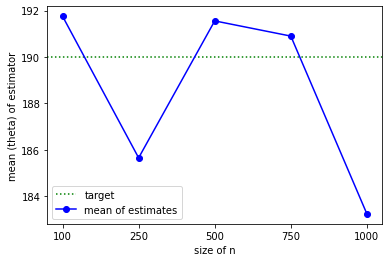

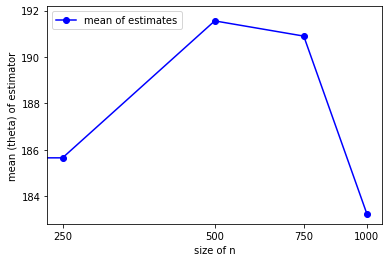

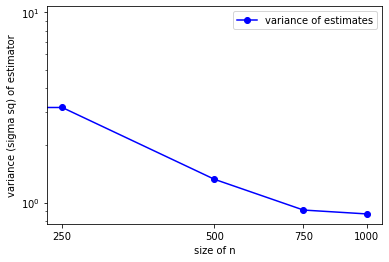

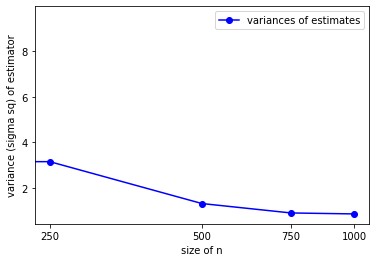

In [14]:
theta_hat_vec = []
sigma_sq_hat_vec = []

true_mean = 190
true_sd = 30

list_of_n = [100, 250, 500, 750, 1000, 1250]

#estimating mean of gaussian
for n in list_of_n:
    data = np.random.normal(true_mean, true_sd, n)
    theta, sigma_sq = blb(estimator_mean, data, n)
    theta_hat_vec.append(theta)
    sigma_sq_hat_vec.append(sigma_sq)
    
plot(true_mean)

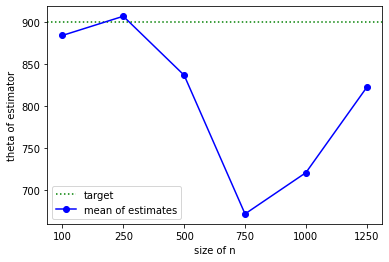

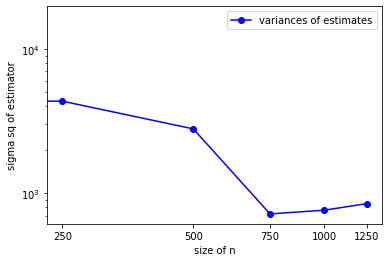

In [12]:
theta_hat_vec = []
sigma_sq_hat_vec = []

true_mean = 190
true_sd = 30
true_var = true_sd**2

list_of_n = [100, 250, 500, 750, 1000, 1250]

#estimating variance of gaussian
for n in list_of_n:
    data = np.random.normal(true_mean, true_sd, n)
    theta, sigma_sq = blb(estimator_var, data, n)
    theta_hat_vec.append(theta)
    sigma_sq_hat_vec.append(sigma_sq)
    
plot(true_var)

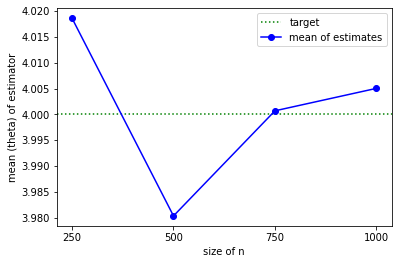

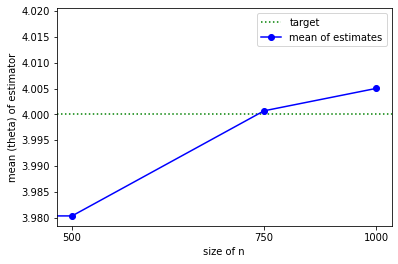

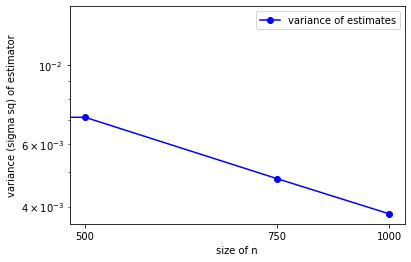

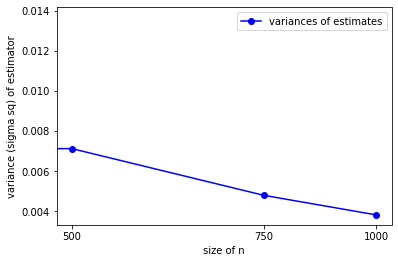

In [21]:
theta_hat_vec = []
sigma_sq_hat_vec = []

T = 25 #trials

true_theta = 4


#list_of_n = [100, 250, 500, 750, 1000, 1250]
list_of_n = [250, 500, 750, 1000]


#estimating mean of poisson
for n in list_of_n:
    trials_theta = np.zeros(T)
    trials_sigma_sq = np.zeros(T)
    # for t in T
    for t in range(T):
        data = np.random.poisson(true_theta, n)
        theta, sigma_sq = blb(estimator_mean, data, n) #returns mean and variance of estimator
        trials_theta[t] = theta
        trials_sigma_sq[t] = sigma_sq
        
    theta_hat_vec.append(np.mean(trials_theta))
    sigma_sq_hat_vec.append(np.mean(trials_sigma_sq))
    
plot(true_theta)

In [28]:
# Confidence Intervals Using the normal Distribution (n>30)

ci_vec = []
count = 0 

for i in range(len(theta_hat_vec)):
    print(theta_hat_vec[i])
    ci = st.norm.interval(alpha=0.95, loc=theta_hat_vec[i], scale=np.sqrt(sigma_sq_hat_vec[i]))
    ci_vec.append(ci)
    print(ci)
    
    # checking to see if true theta is in CI
    if ci[0] <= true_theta <= ci[1]:
        count += 1
    
print("success rate: if true theta is in CI " + str(count/len(ci_vec)))
    
#
for ci in ci_vec:
    print(ci[1]-ci[0])
    

4.018597536000001
(3.7893335983299017, 4.247861473670099)
3.9803581120000002
(3.814901259215426, 4.145814964784575)
4.000691637333333
(3.8649694697095796, 4.136413804957087)
4.005032136
(3.8839099229628786, 4.126154349037121)
success rate: if true theta is in CI 1.0
0.45852787534019734
0.3309137055691487
0.27144433524750733
0.24224442607424201
